In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from deepq import DeepQPlayer,RandomPlayer,QPlayer,Board,DeepQPlayerV2,generate_random_board,visualize,MonteCarloPlayer,DeepQPlayerV3
from IPython.display import clear_output
import time

In [2]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

In [4]:
def replay(all_boards,sleep_time:int=1):
    for board in all_boards:
        visualize(board)
        time.sleep(sleep_time)
        clear_output(wait=True)

In [5]:
def get_next_board_state(board,action,player_symbol):
    try:
        _board = board.copy()
        col = _board[:,action]
        idx = int(np.where(col == 0)[0][-1])
        col[idx] = player_symbol
        return _board
    except:
        return None
def get_possible_moves(board):
    return [i for i,j in enumerate(board[0]) if j == 0]

In [6]:
def test_simulate_game(player:DeepQPlayer,num_moves=4):
    player.reset()
    brd = np.zeros(shape=(player.num_cols,player.num_rows))
    for i in range(num_moves):
        p1_act = player.choose_action(get_possible_moves(brd),brd)
        brd = get_next_board_state(brd,p1_act,player.player_symbol)
        brd = get_next_board_state(brd,np.random.choice(get_possible_moves(brd)),player.player_symbol * -1)

        player.give_reward(0,s_prime=brd)
        

# test_simulate_game(p)
    

In [7]:

    
q1 = DeepQPlayerV2(player_symbol=1,name='q_1_cooling_deep')


q1.loadPolicy('q_network_q1_Input_Mapper_vsq_small_train')
q2 = DeepQPlayerV2(player_symbol=-1,name='q_tables/deep/q_2_cooling_deep')
q2.loadPolicy('q_tables/deep/q_network_qv2_1_cooling_deepV2')
 

q_1_cooling_deep Loaded Q and Q Prime networks from file q_network_q1_Input_Mapper_vsq_small_train
q_tables/deep/q_2_cooling_deep Loaded Q and Q Prime networks from file q_tables/deep/q_network_qv2_1_cooling_deepV2


In [8]:
%%time
winners = []

r2 = RandomPlayer(player_symbol=-1)
monte_2 = MonteCarloPlayer(player_symbol=-1)
# q2.loadPolicy('policy_q_2_cooling')
b2 = Board(q1,r2,num_rows=6,num_cols=7)
for i in range(1000):
    q1.epsilon = 0.0
    q2.epsilon = 0.0
    winners.append(b2.play_agents(verbose=False))
    b2.reset()
    q1.reset()
    q2.reset()

winners = [i if i is not None else 0 for i in winners]
print(np.unique(winners,return_counts=True))



(array([1]), array([1000]))
CPU times: user 18.1 s, sys: 1.39 s, total: 19.5 s
Wall time: 19.3 s


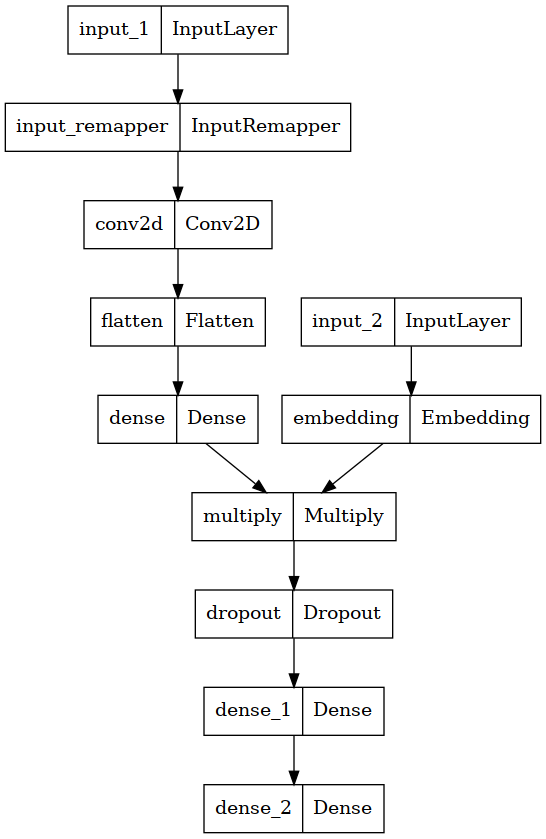

In [9]:
tf.keras.utils.plot_model(q1.q_network)

QFunction: [0.19, 0.24, 0.25, 0.29, 0.25, 0.23, 0.19]
Targets (alpha=0): [0. 0. 0. 0. 0. 0. 0.]
Targets (alpha=1): [0.14 0.17 0.15 0.22 0.21 0.12 0.13]


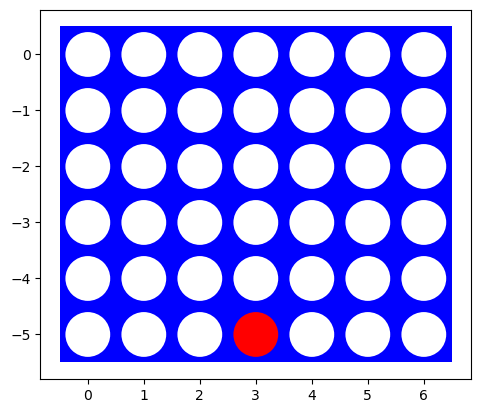

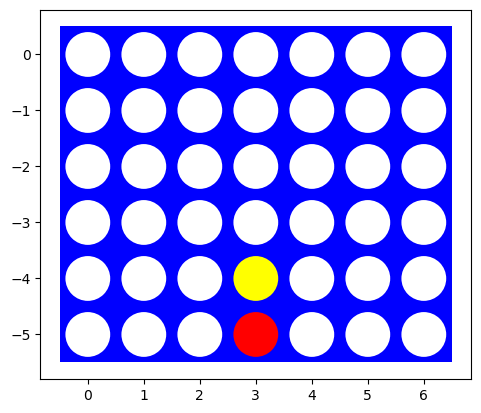


QFunction: [0.31, 0.33, 0.43, 0.3, 0.43, 0.36, 0.27]
Targets (alpha=0): [0.   0.05 0.1  0.   0.05 0.05 0.05]
Targets (alpha=1): [0.22 0.14 0.21 0.21 0.36 0.16 0.24]


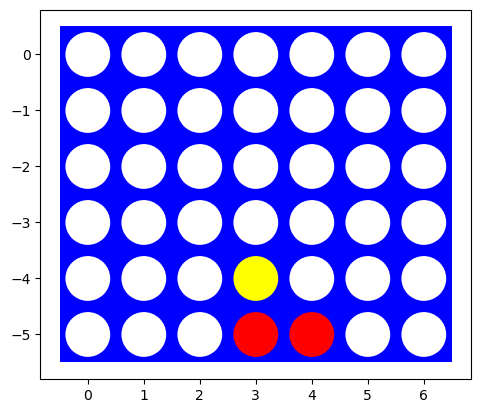

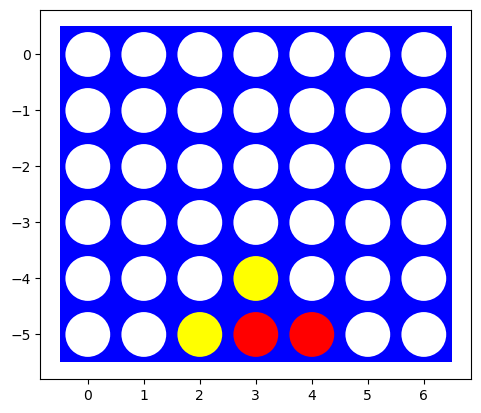


QFunction: [0.26, 0.25, 0.26, 0.28, 0.33, 0.38, 0.35]
Targets (alpha=0): [-0.05 -0.05  0.05 -0.05  0.05  0.05  0.  ]
Targets (alpha=1): [0.19 0.17 0.19 0.13 0.22 0.13 0.12]


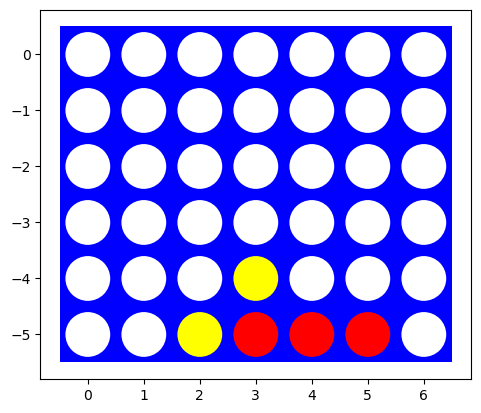

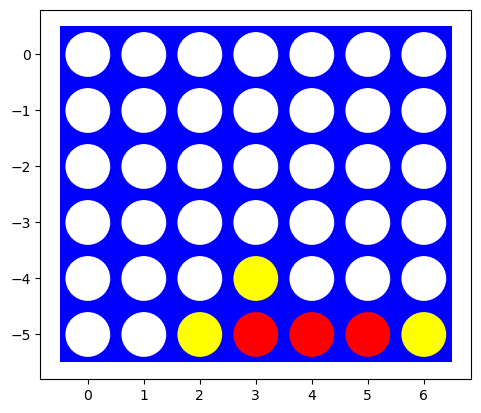


QFunction: [0.2, 0.2, 0.23, 0.22, 0.25, 0.24, 0.22]
Targets (alpha=0): [-0.15 -0.05  0.1   0.05  0.15  0.05  0.05]
Targets (alpha=1): [0.11 0.12 0.14 0.14 0.12 0.21 0.12]


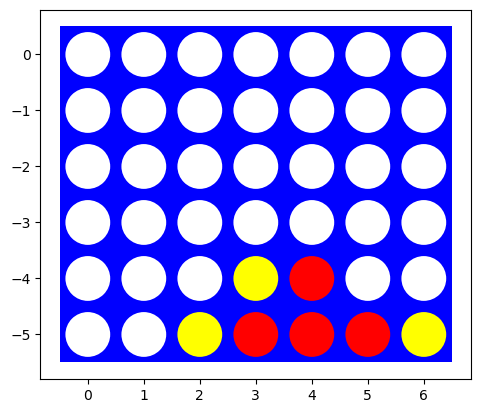

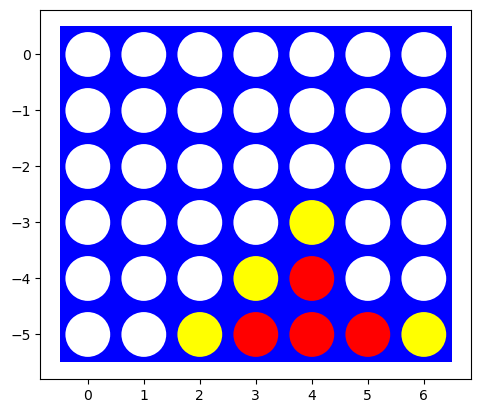


QFunction: [0.17, 0.23, 0.18, 0.2, 0.22, 0.16, 0.16]
Targets (alpha=0): [-0.36 -0.31 -0.44 -0.27 -0.22 -0.17 -0.27]
Targets (alpha=1): [0.1  0.15 0.13 0.1  0.13 0.2  0.05]


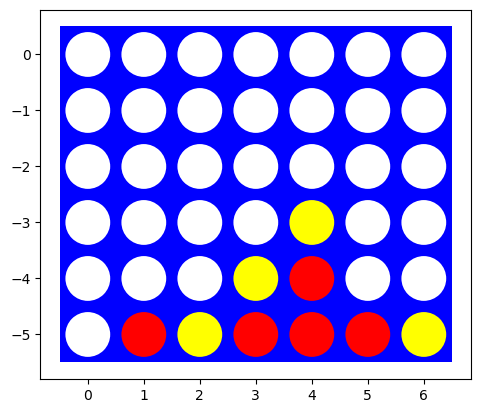

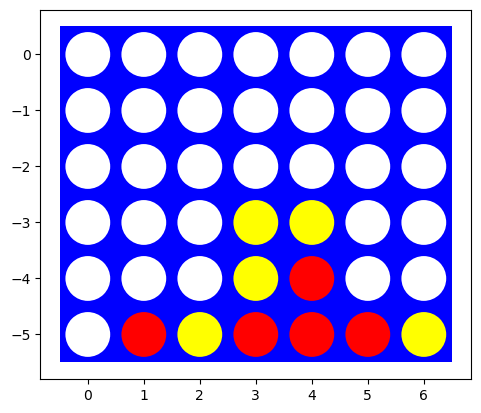


QFunction: [0.06, 0.25, 0.01, 0.05, 0.06, -0.05, -0.06]
Targets (alpha=0): [-0.52 -0.52 -0.92 -0.48 -0.66 -0.48 -0.66]
Targets (alpha=1): [0.02 0.23 0.12 0.15 0.17 0.08 0.04]


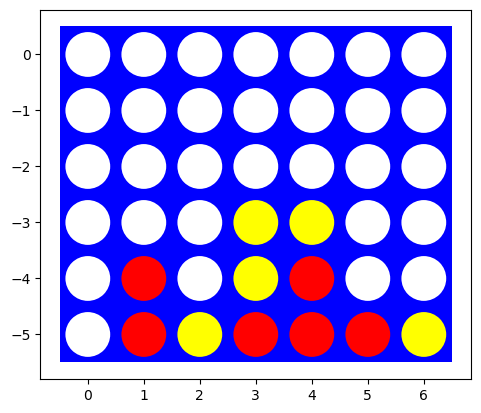

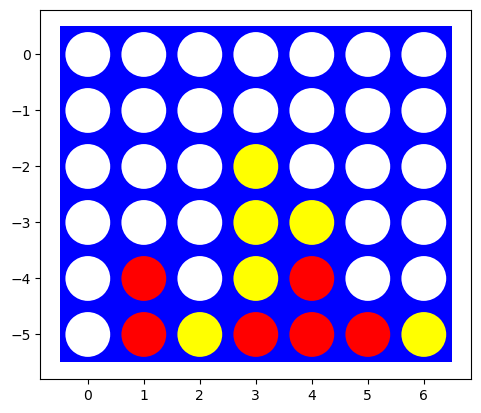


QFunction: [-0.61, -0.39, -0.55, -0.38, -0.59, -0.26, -0.65]
Targets (alpha=0): [-1 -1 -1 -1 -1 -1 -1]
Targets (alpha=1): [-1 -1 -1 -1 -1 -1 -1]


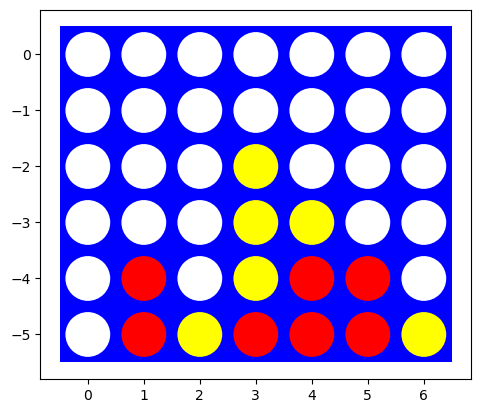

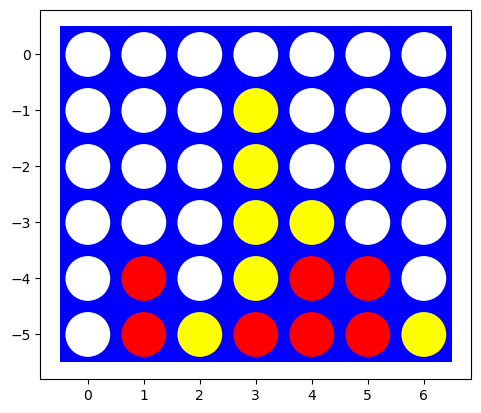


Player -1 Wins!


In [10]:
from deepq import GreedyPlayer
q1.reset()
# q2.reset()
q1.epsilon = 0.0
# q2.epsilon = 0.5
gp = GreedyPlayer(player_symbol=-1)
# b2.reset()
b3 = Board(q1,monte_2,num_rows=6,num_cols=7)
boards = b3.play_agents(return_boards=False,verbose=2)
# replay(boards)

QFunction: [0.19, 0.24, 0.25, 0.29, 0.25, 0.23, 0.19]
Targets (alpha=0): [0. 0. 0. 0. 0. 0. 0.]
Targets (alpha=1): [0.11 0.18 0.15 0.22 0.14 0.13 0.14]


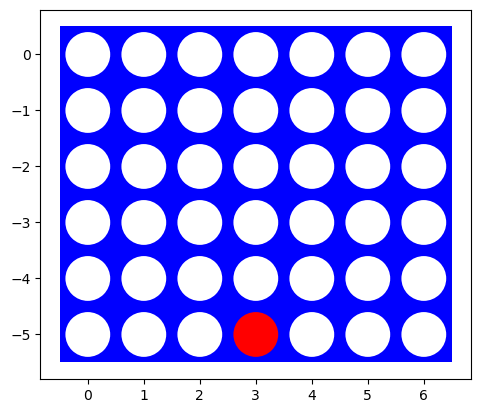

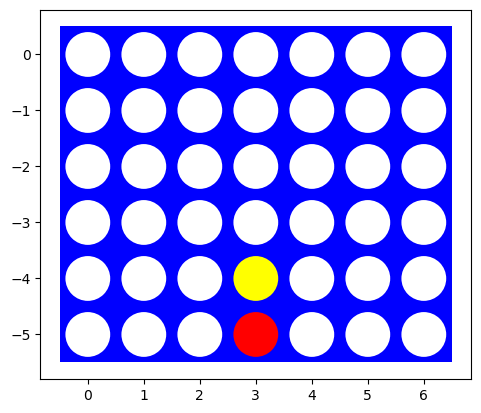


QFunction: [0.31, 0.33, 0.43, 0.3, 0.43, 0.36, 0.27]
Targets (alpha=0): [ 0.   -0.05  0.   -0.05  0.1   0.05  0.05]
Targets (alpha=1): [0.21 0.14 0.34 0.12 0.22 0.16 0.23]


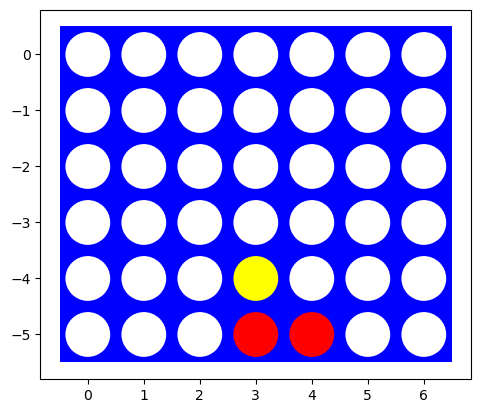

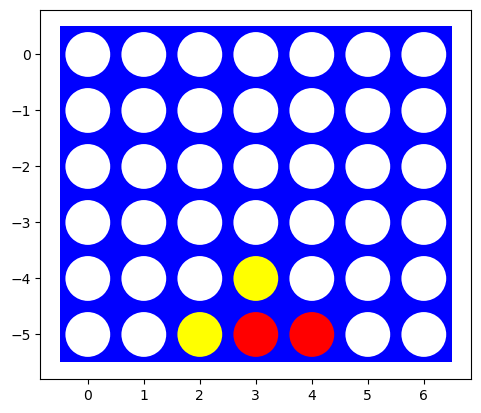


QFunction: [0.26, 0.25, 0.26, 0.28, 0.33, 0.38, 0.35]
Targets (alpha=0): [-0.05 -0.1   0.05  0.    0.1   0.05  0.  ]
Targets (alpha=1): [0.19 0.19 0.19 0.21 0.23 0.13 0.12]


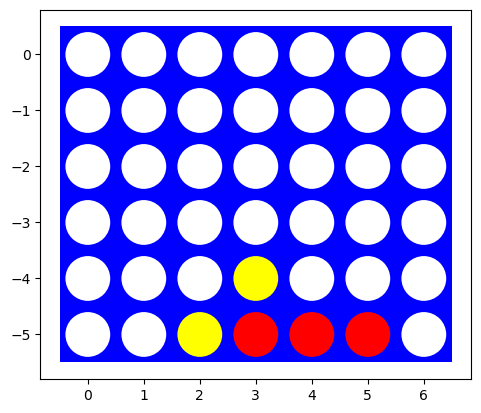

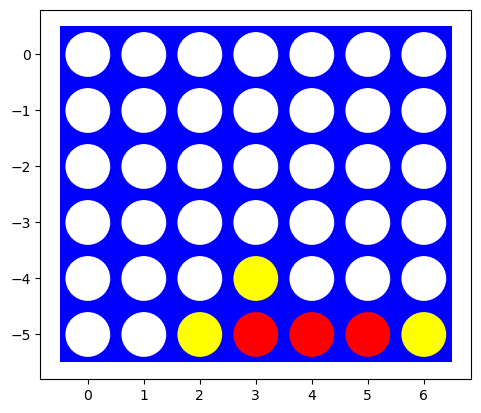


QFunction: [0.2, 0.2, 0.23, 0.22, 0.25, 0.24, 0.22]
Targets (alpha=0): [ 0.   -0.1   0.    0.05  0.2   0.05  0.05]
Targets (alpha=1): [0.13 0.13 0.13 0.15 0.21 0.21 0.13]


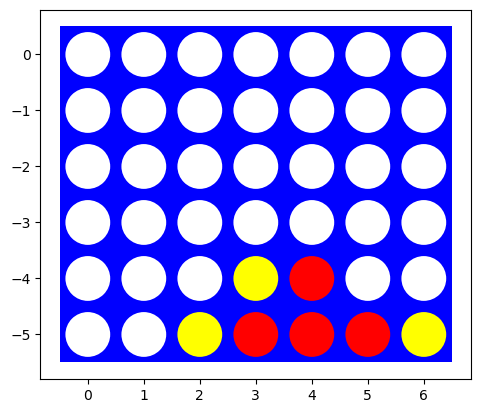

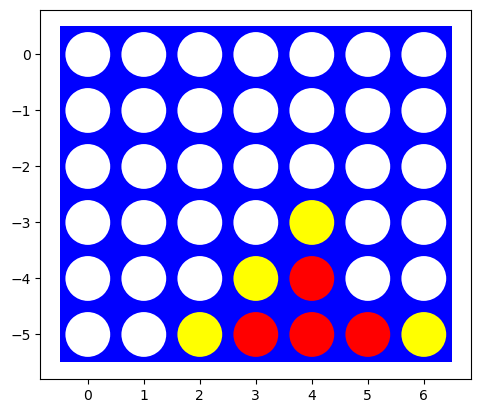


QFunction: [0.17, 0.23, 0.18, 0.2, 0.22, 0.16, 0.16]
Targets (alpha=0): [-0.48 -0.31 -0.22  0.   -0.44 -0.4  -0.27]
Targets (alpha=1): [0.01 0.15 0.11 0.07 0.12 0.08 0.05]


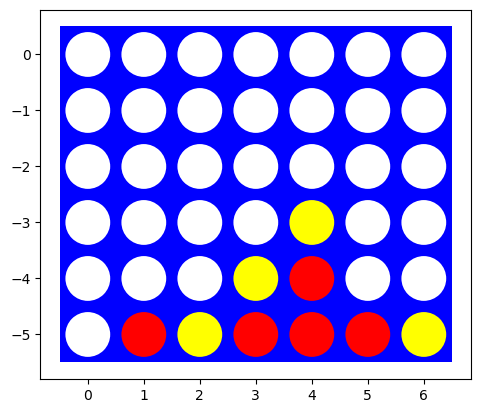

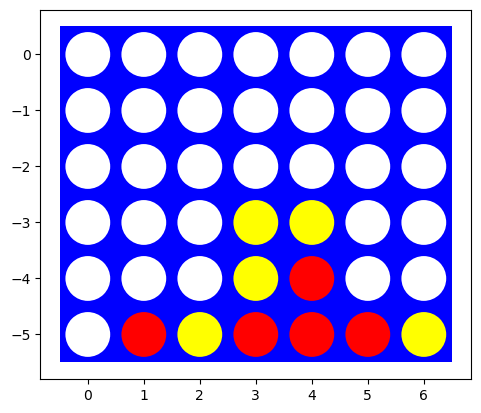


QFunction: [0.06, 0.25, 0.01, 0.05, 0.06, -0.05, -0.06]
Targets (alpha=0): [-0.44 -0.66 -0.4  -0.4  -0.66 -0.4  -0.48]
Targets (alpha=1): [-0.05 -0.07 -0.04  0.08 -0.04  0.01  0.04]


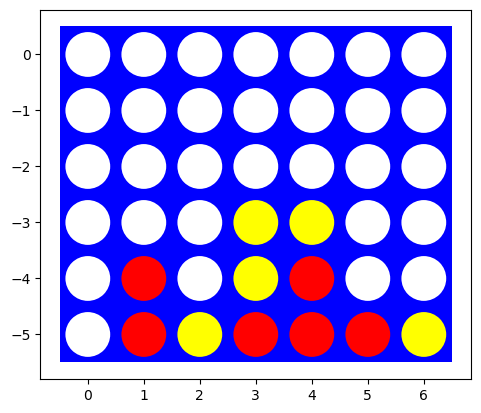

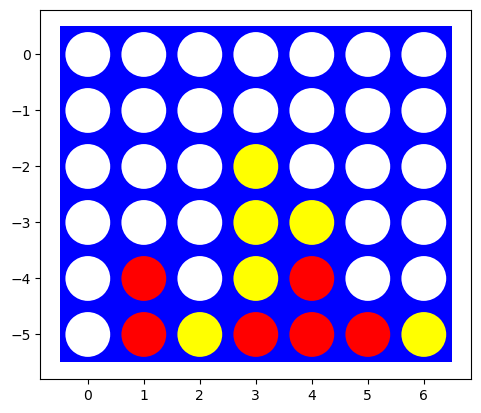


QFunction: [-0.61, -0.39, -0.55, -0.38, -0.59, -0.26, -0.65]
Targets (alpha=0): [-1 -1 -1 -1 -1 -1 -1]
Targets (alpha=1): [-1 -1 -1 -1 -1 -1 -1]


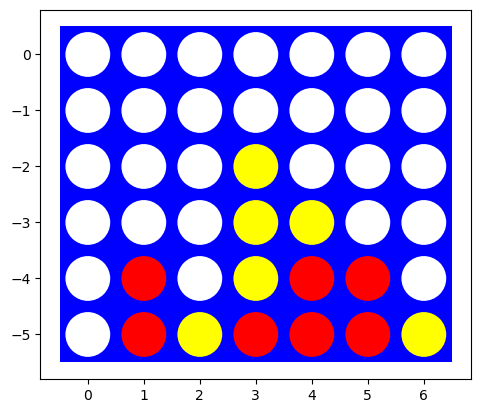

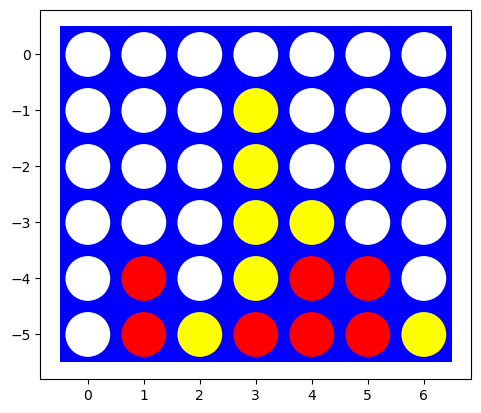


Player -1 Wins!


-1

In [11]:
q1.reset()
q1.epsilon = 0.0
b3.reset()
b3.play_agents(verbose=2)

QFunction: [0.19, 0.24, 0.25, 0.29, 0.25, 0.23, 0.19]
Targets (alpha=0): [0. 0. 0. 0. 0. 0. 0.]
Targets (alpha=1): [0.15 0.19 0.15 0.2  0.21 0.12 0.14]


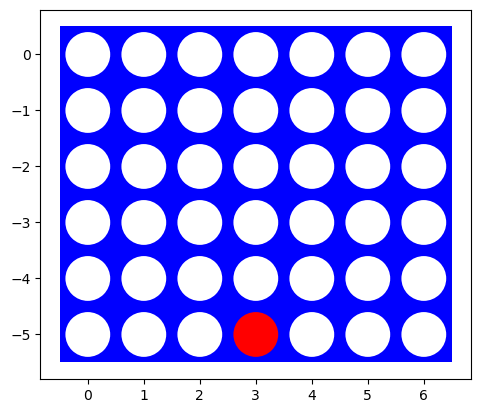


[-999, -999, -999, -999, -999, -999, -999]


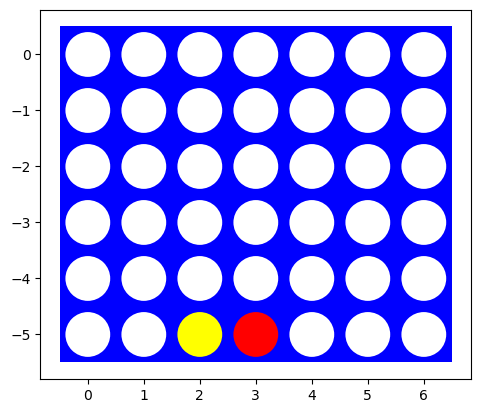


QFunction: [0.21, 0.23, 0.23, 0.29, 0.26, 0.25, 0.24]
Targets (alpha=0): [ 0.   -0.05  0.05  0.    0.    0.    0.05]
Targets (alpha=1): [0.16 0.15 0.14 0.22 0.2  0.17 0.16]


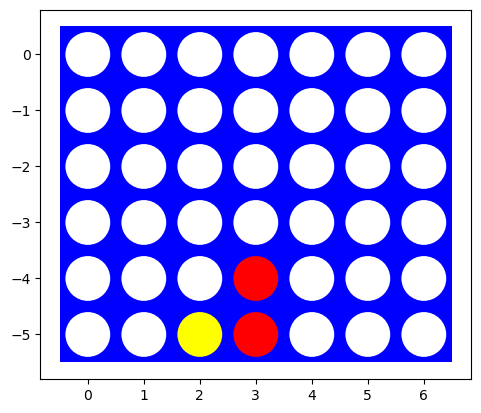


[-999, -999, -999, -999, -999, -999, -999]


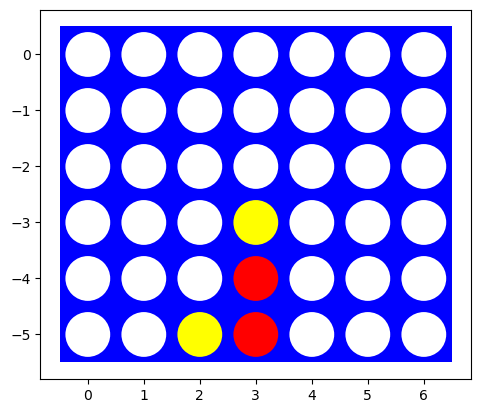


QFunction: [0.23, 0.24, 0.25, 0.25, 0.26, 0.25, 0.24]
Targets (alpha=0): [ 0.   -0.05  0.2   0.05  0.1   0.05 -0.05]
Targets (alpha=1): [0.16 0.13 0.16 0.13 0.23 0.14 0.21]


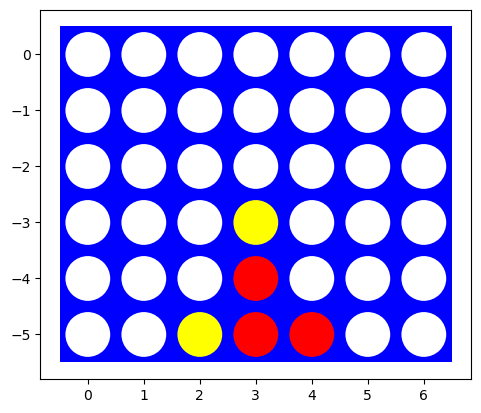


[-999, -999, -999, -999, -999, -999, -999]


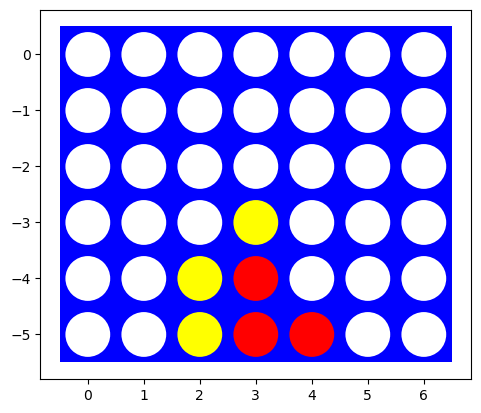


QFunction: [0.34, 0.3, 0.33, 0.33, 0.37, 0.45, 0.45]
Targets (alpha=0): [-0.1  -0.48  0.31 -0.05 -0.1   0.   -0.1 ]
Targets (alpha=1): [0.21 0.06 0.22 0.23 0.21 0.19 0.21]


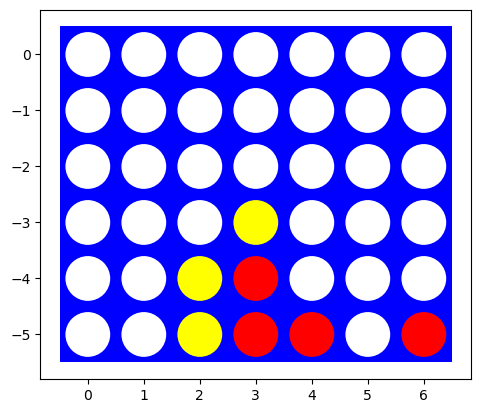


[-999, -999, -999, -999, -999, -999, -999]


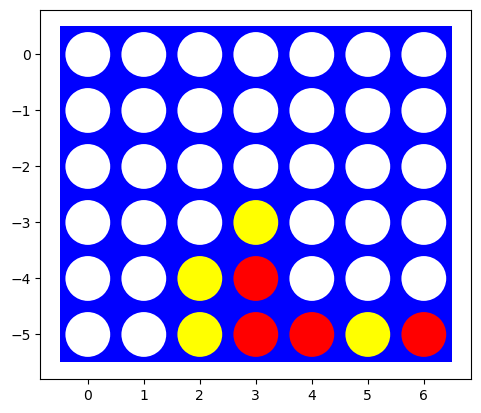


QFunction: [0.3, 0.28, 0.33, 0.35, 0.39, 0.42, 0.39]
Targets (alpha=0): [-0.4  -0.05  0.31  0.   -0.22 -0.31 -0.4 ]
Targets (alpha=1): [0.13 0.1  0.14 0.09 0.23 0.18 0.15]


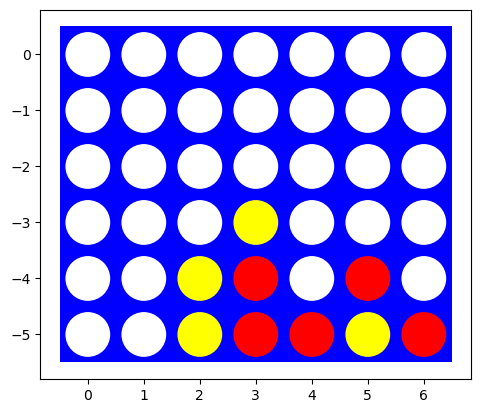


[-999, -999, -999, -999, -999, -999, -999]


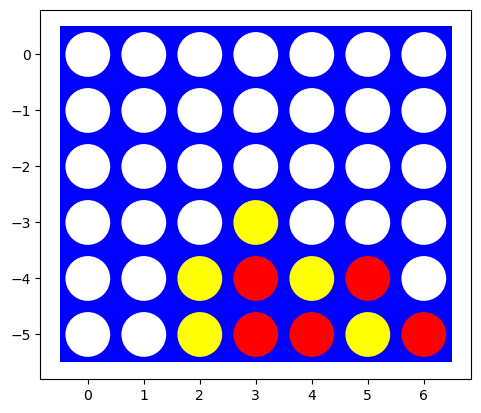


QFunction: [0.1, 0.1, -0.01, 0.15, 0.2, 0.17, 0.16]
Targets (alpha=0): [-0.64 -0.36 -1.   -0.52 -0.4  -0.72 -0.4 ]
Targets (alpha=1): [ 0.07  0.12 -1.    0.01  0.05  0.21  0.01]


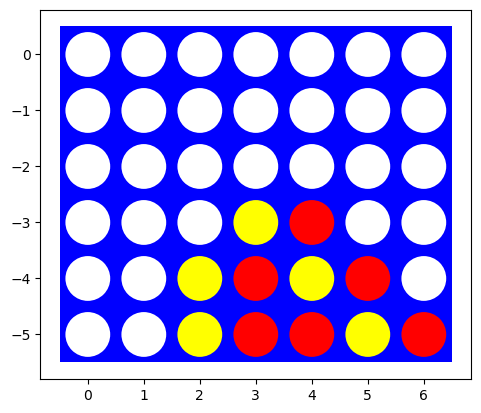


[-999, -999, -999, -999, -999, -999, -999]


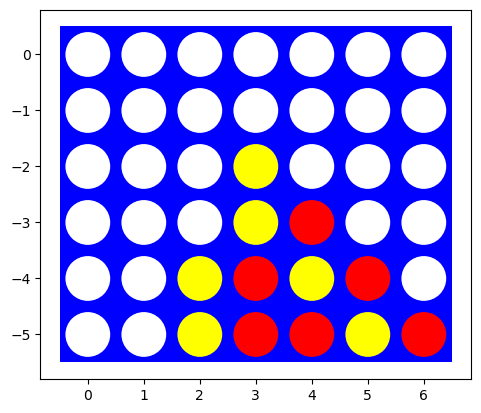


QFunction: [-0.25, -0.25, -0.26, -0.15, 0.1, -0.17, -0.24]
Targets (alpha=0): [-0.64 -0.44 -1.   -0.76 -0.54 -0.6  -0.6 ]
Targets (alpha=1): [-0.21  0.11 -1.    0.13  0.11 -0.03  0.15]


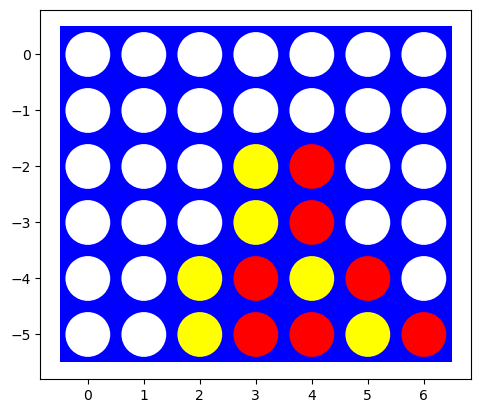


[-999, -999, -999, -999, -999, -999, -999]


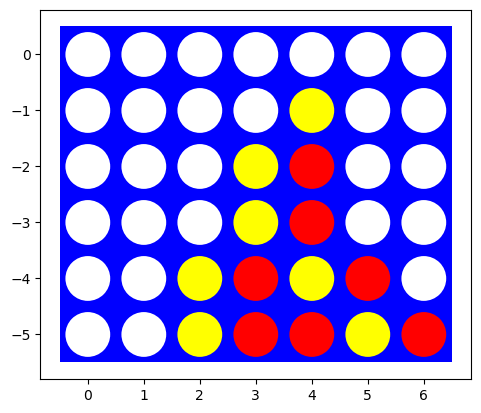


QFunction: [0.15, 0.16, 0.04, 0.11, 0.18, 0.22, 0.16]
Targets (alpha=0): [-0.91 -0.31 -1.   -0.27 -0.36 -0.27 -0.27]
Targets (alpha=1): [-0.05 -0.01 -1.    0.16 -0.04  0.25  0.05]


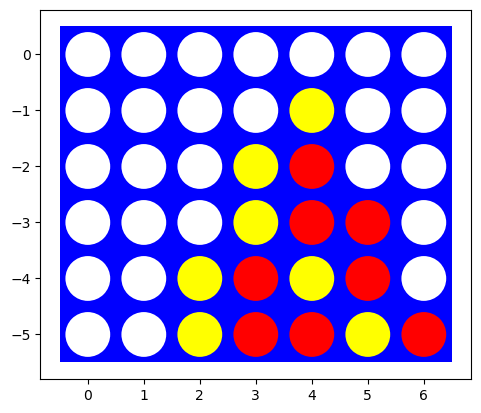


[-999, -999, -999, -999, -999, -999, -999]


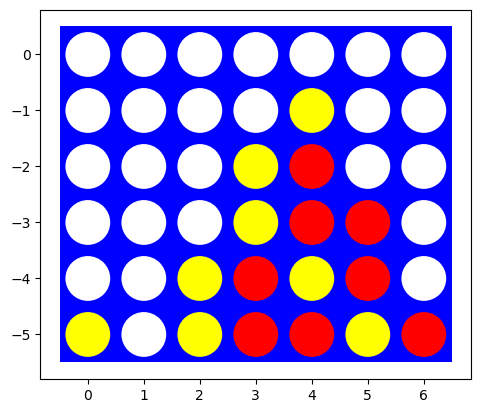


QFunction: [0.28, 0.27, 0.12, 0.32, 0.35, 0.53, 0.32]
Targets (alpha=0): [-0.31 -0.27 -1.    0.1  -0.36  0.   -0.64]
Targets (alpha=1): [ 0.26  0.23 -1.    0.26  0.23  0.15  0.1 ]


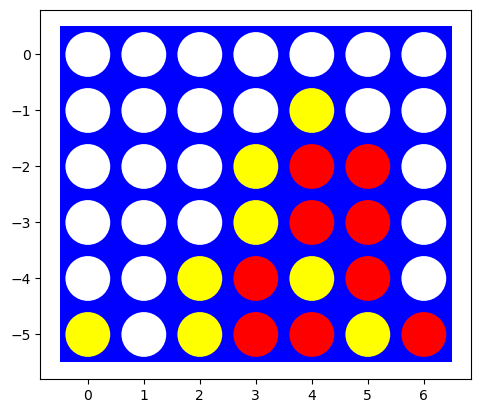


[-999, -999, -999, -999, -999, -999, -999]


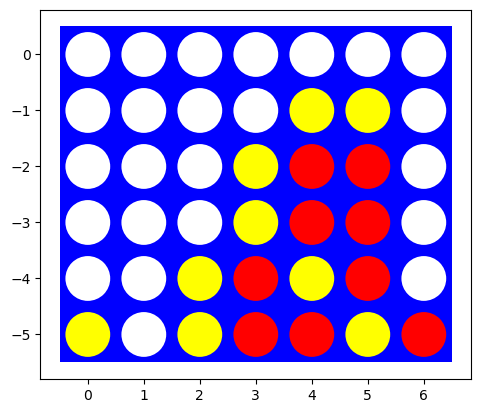


QFunction: [0.09, 0.19, 0.08, 0.19, 0.22, 0.15, 0.29]
Targets (alpha=0): [-0.9  -0.57 -1.    0.44 -0.89 -0.79 -0.77]
Targets (alpha=1): [ 0.18  0.09 -1.    0.18  0.2   0.08  0.12]


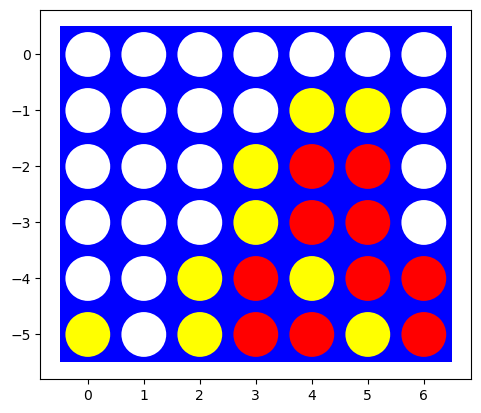


[-999, -999, -999, -999, -999, -999, -999]


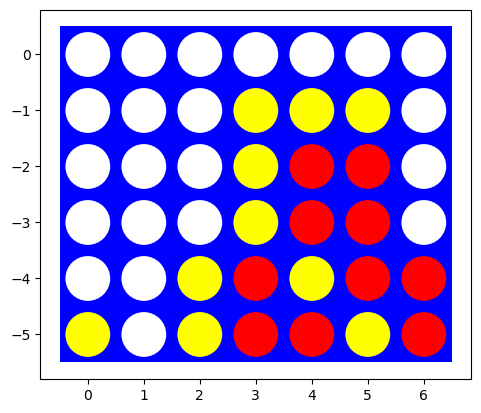


QFunction: [-0.54, -0.43, -0.41, 0.25, -0.41, -0.51, -0.08]
Targets (alpha=0): [-1.   -1.   -1.   -0.64 -1.   -1.   -1.  ]
Targets (alpha=1): [-1.   -1.   -1.    0.23 -1.   -1.   -1.  ]


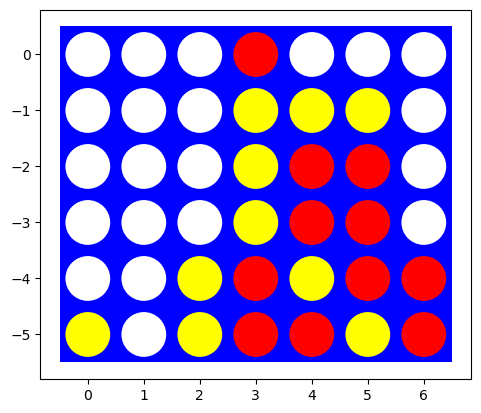


[-999, -999, -999, -999, -999, -999, -999]


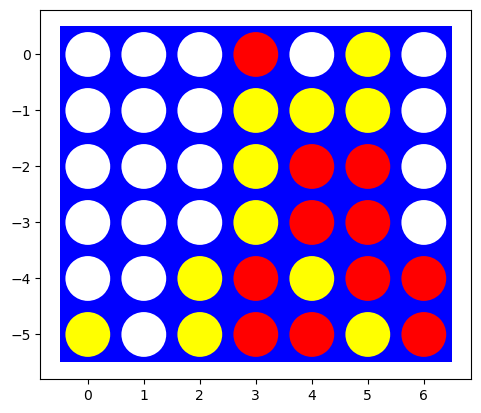


QFunction: [0.19, 0.25, 0.17, 0.36, 0.31, 0.24, 0.51]
Targets (alpha=0): [-1 -1 -1 -1 -1 -1 -1]
Targets (alpha=1): [-1 -1 -1 -1 -1 -1 -1]


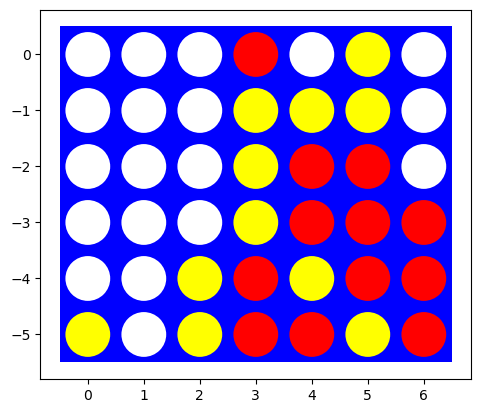


[-999, -999, -999, -999, -999, -999, -999]


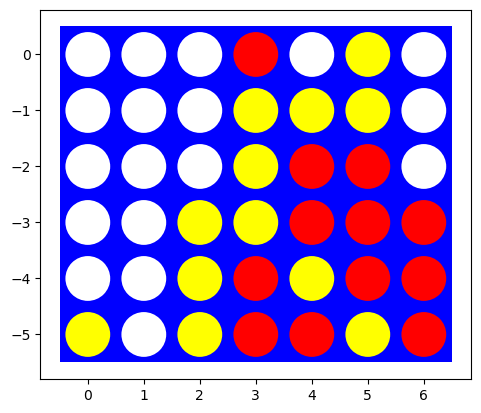


Player -1 Wins!


-1

In [13]:
from deepq import HumanPlayer
b5 = Board(q1,HumanPlayer(player_symbol=-1))
b5.play_agents(verbose=2)